In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
#create a copy of the dataframe
df_copy = df.copy()


In [4]:
"""
#column explanation
school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
sex - student's sex (binary: 'F' - female or 'M' - male)
age - student's age (numeric: from 15 to 22)
address - student's home address type (binary: 'U' - urban or 'R' - rural)
famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
guardian - student's guardian (nominal: 'mother', 'father' or 'other')
traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
failures - number of past class failures (numeric: n if 1<=n<3, else 4)
schoolsup - extra educational support (binary: yes or no)
famsup - family educational support (binary: yes or no)
paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
activities - extra-curricular activities (binary: yes or no)
nursery - attended nursery school (binary: yes or no)
higher - wants to take higher education (binary: yes or no)
internet - Internet access at home (binary: yes or no)
romantic - with a romantic relationship (binary: yes or no)
famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
freetime - free time after school (numeric: from 1 - very low to 5 - very high)
goout - going out with friends (numeric: from 1 - very low to 5 - very high)
Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
health - current health status (numeric: from 1 - very bad to 5 - very good)
absences - number of school absences (numeric: from 0 to 93)
These grades are related with the course subject, Math or Portuguese:

G1 - first period grade (numeric: from 0 to 20)
G2 - second period grade (numeric: from 0 to 20)
G3 - final grade (numeric: from 0 to 20, output target)
Additional note: there are several (382) students that belong to both datasets .
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file."""

rfile = open('student-merge.R', 'r')
rfile.read()


'd1=read.table("student-mat.csv",sep=";",header=TRUE)\nd2=read.table("student-por.csv",sep=";",header=TRUE)\n\nd3=merge(d1,d2,by=c("school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"))\nprint(nrow(d3)) # 382 students\n'

In [5]:
df.shape

(395, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [8]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [9]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

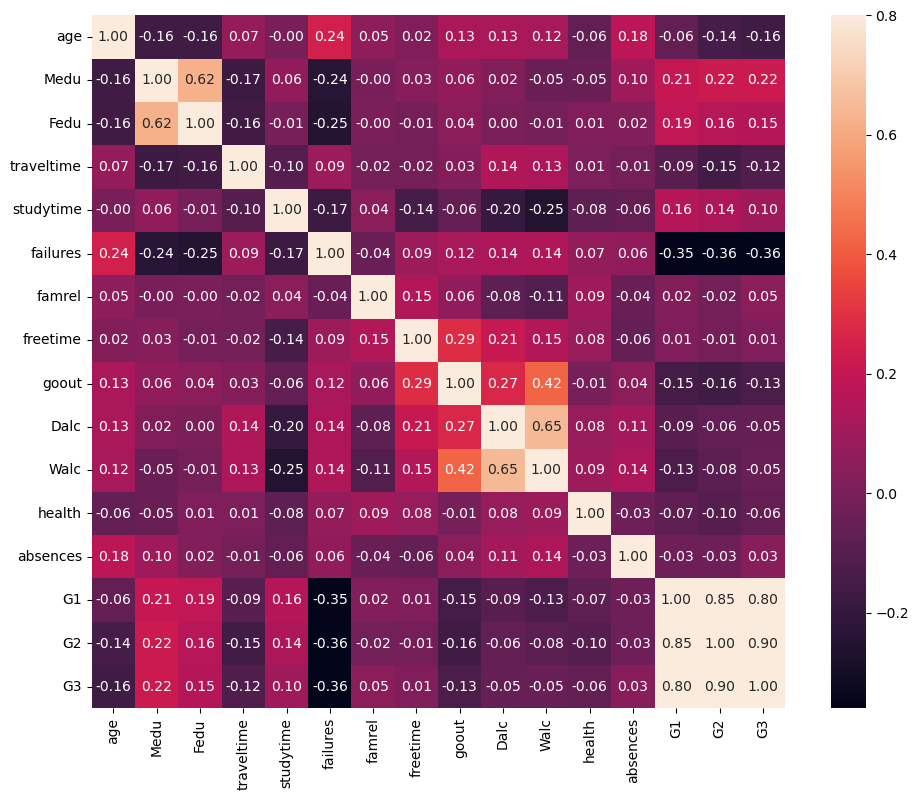

In [10]:
# Data Visualization
# Correlation Matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f')
plt.show()


In [11]:
#sort columns into numerical and categorical by data type
numerical = df.select_dtypes(include=['int64', 'float64']).columns
categorical = df.select_dtypes(include=['object']).columns
print(numerical)

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')


In [12]:
print(categorical)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


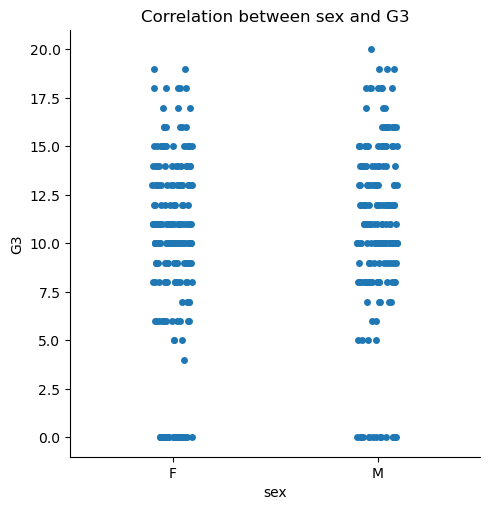

In [13]:
# plot the correlation between sex and G3
sns.catplot(x='sex', y='G3', data=df)
plt.title('Correlation between sex and G3')
plt.show()


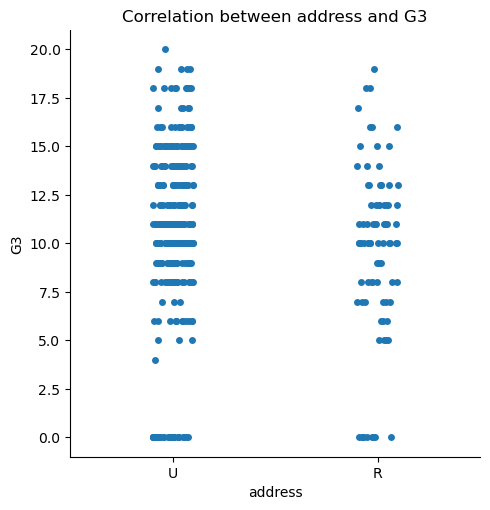

In [14]:
#plot the correlation between address and G3
sns.catplot(x='address', y='G3', data=df)
plt.title('Correlation between address and G3')
plt.show()


In [15]:
#mean score of G3 from urban and rural areas
df.groupby('address')['G3'].mean()


address
R     9.511364
U    10.674267
Name: G3, dtype: float64

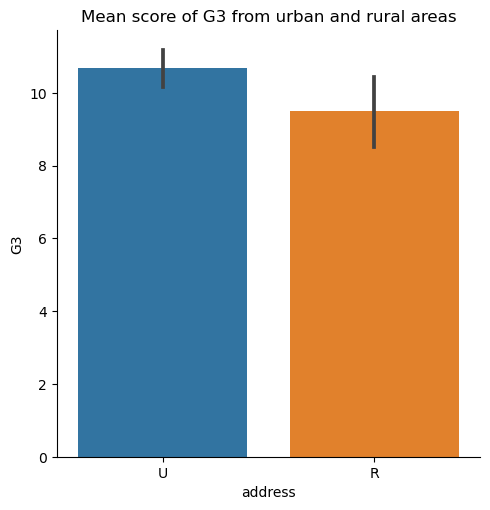

In [16]:
#plot the above result
sns.catplot(x='address', y='G3', data=df, kind='bar')
plt.title('Mean score of G3 from urban and rural areas')
plt.show()


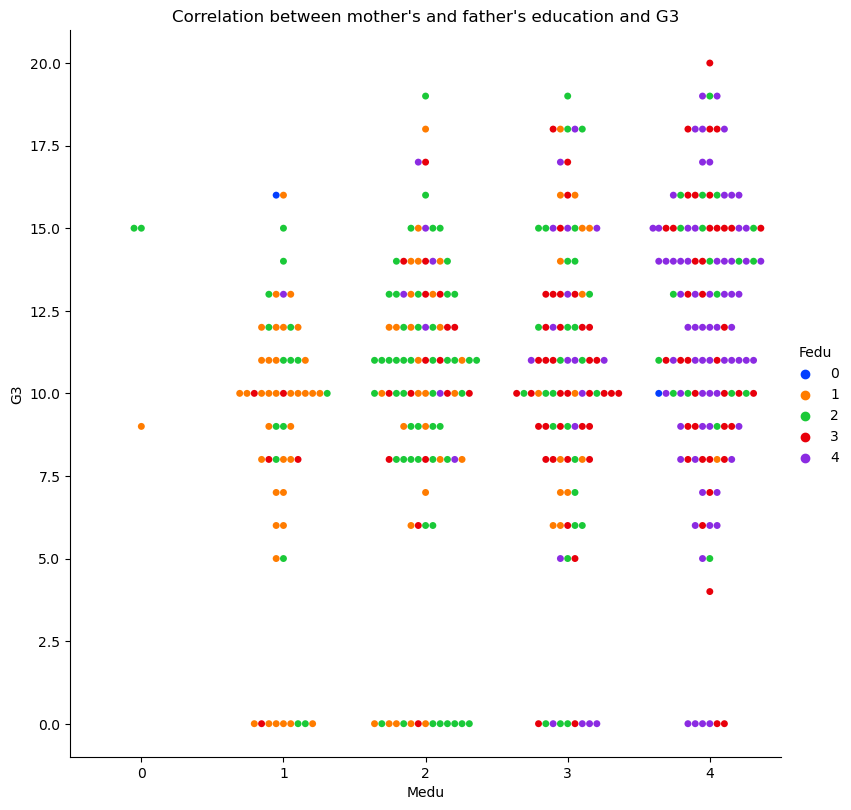

In [17]:
#plot the correlation between both mother's and father's education and G3
sns.catplot(x="Medu", y="G3", hue="Fedu", kind="swarm", data=df, height=8, palette="bright")
plt.title("Correlation between mother's and father's education and G3")
plt.show()


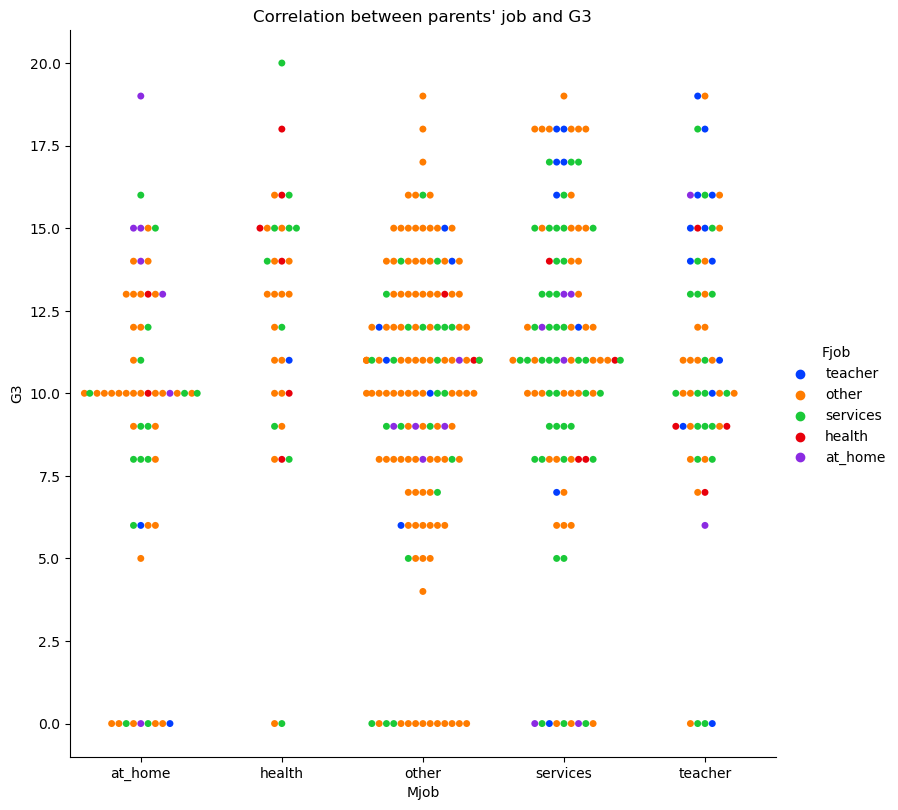

In [18]:
#plot the correlation between parents' job and G3
sns.catplot(x="Mjob", y="G3", hue="Fjob", kind="swarm", data=df, height=8, palette="bright")
plt.title("Correlation between parents' job and G3")
plt.show()


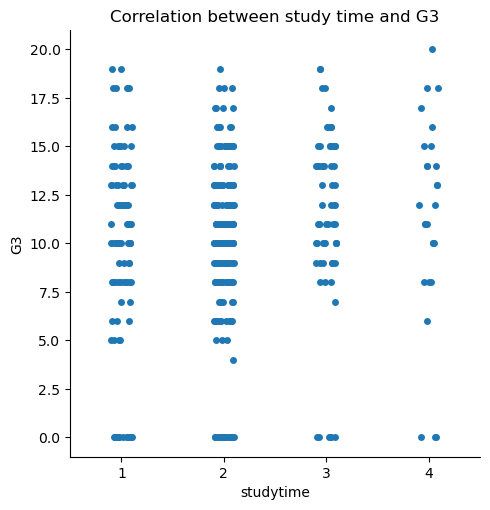

In [19]:
#plot the correlation between study time and G3
sns.catplot(x='studytime', y='G3', data=df)
plt.title('Correlation between study time and G3')
plt.show()


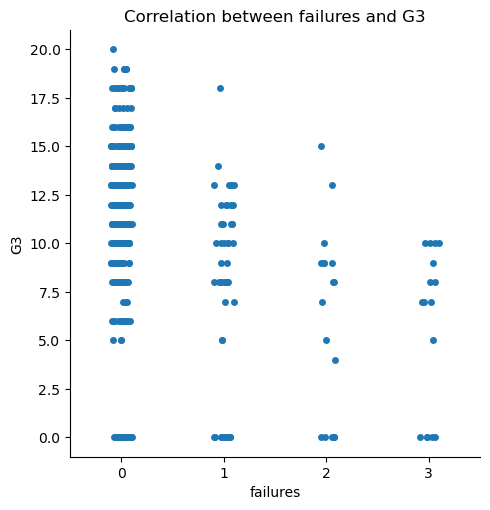

In [20]:
#plot the correlation between failures and G3
sns.catplot(x='failures', y='G3', data=df)
plt.title('Correlation between failures and G3')
plt.show()


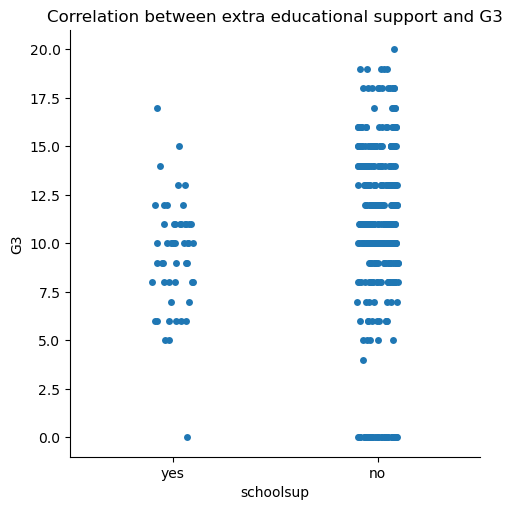

In [21]:
#plot the correlation between extra educational support and G3
sns.catplot(x='schoolsup', y='G3', data=df)
plt.title('Correlation between extra educational support and G3')
plt.show()


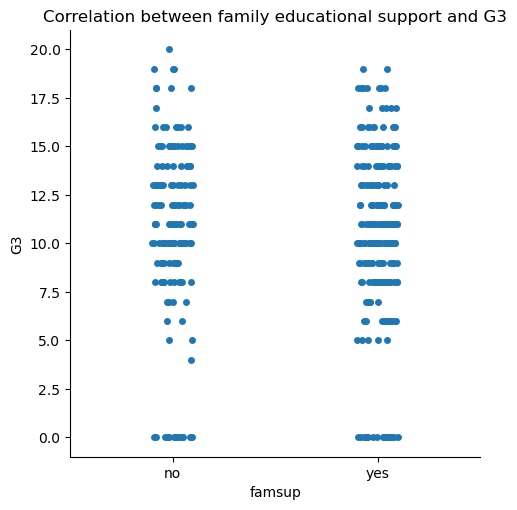

In [22]:
#plot the correlation between family educational support and G3
sns.catplot(x='famsup', y='G3', data=df)
plt.title('Correlation between family educational support and G3')
plt.show()


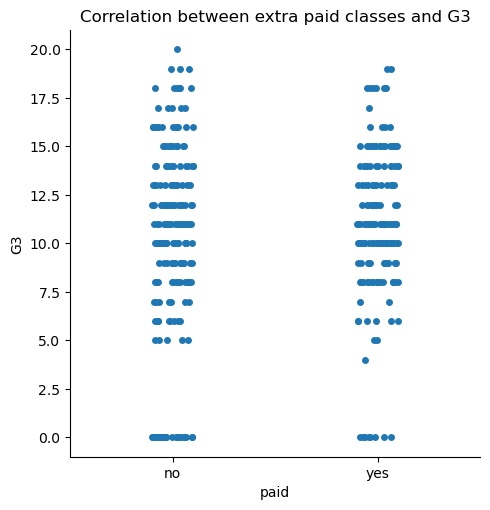

In [23]:
#plot the correlation between extra paid classes and G3
sns.catplot(x='paid', y='G3', data=df)
plt.title('Correlation between extra paid classes and G3')
plt.show()


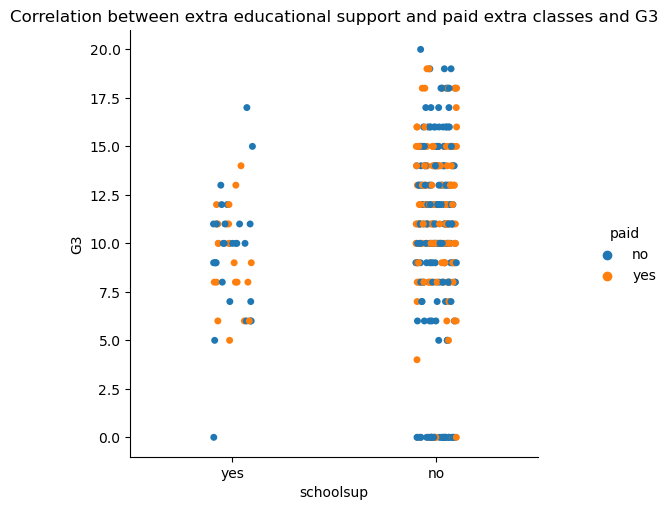

In [24]:
#plot the correlation between extra educational support and paid extra classes and G3
sns.catplot(x='schoolsup', y='G3', hue='paid', data=df)
plt.title('Correlation between extra educational support and paid extra classes and G3')
plt.show()

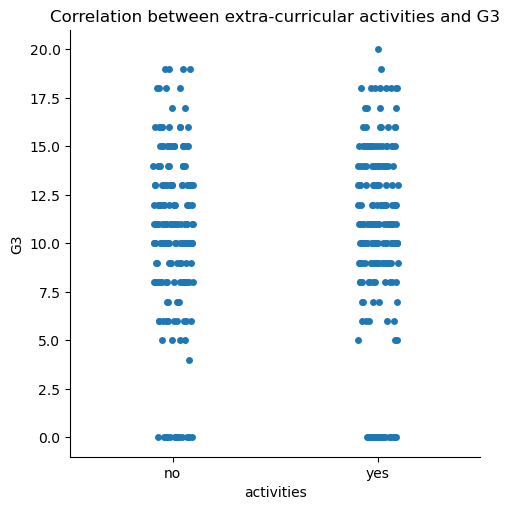

In [25]:
#plot the correlation between extra-curricular activities and G3
sns.catplot(x='activities', y='G3', data=df)
plt.title('Correlation between extra-curricular activities and G3')
plt.show()


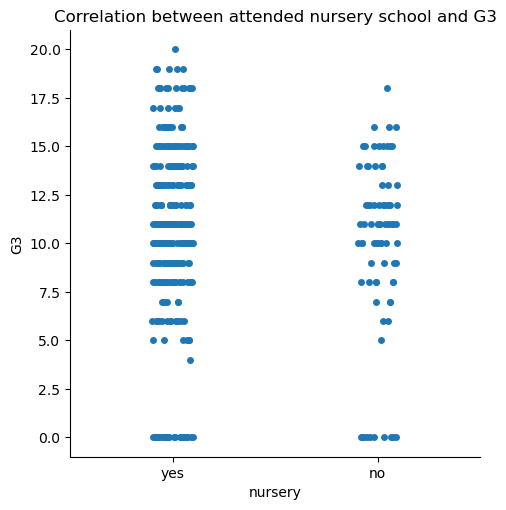

In [26]:
#plot the correlation between attended nursery school and G3
sns.catplot(x='nursery', y='G3', data=df)
plt.title('Correlation between attended nursery school and G3')
plt.show()


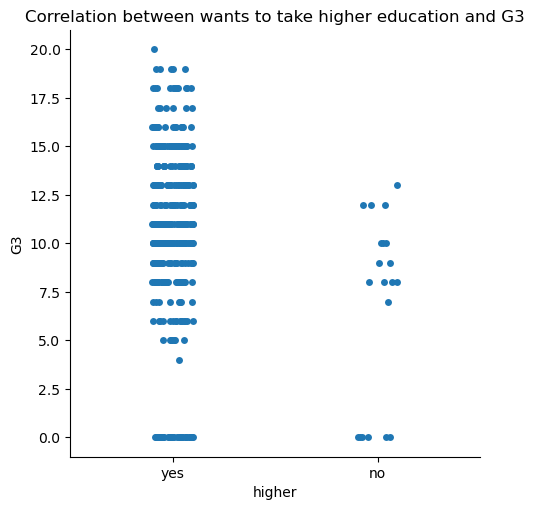

In [27]:
#plot the correlation between wants to take higher education and G3
sns.catplot(x='higher', y='G3', data=df)
plt.title('Correlation between wants to take higher education and G3')
plt.show()


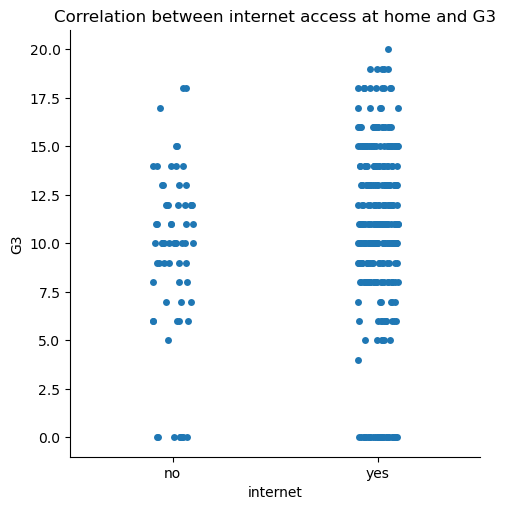

In [28]:
#plot the correlation between internet access at home and G3
sns.catplot(x='internet', y='G3', data=df)
plt.title('Correlation between internet access at home and G3')
plt.show()


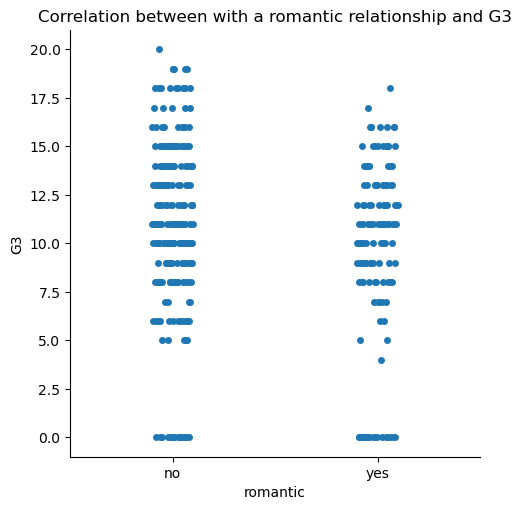

In [29]:
#plot the correlation between with a romantic relationship and G3
sns.catplot(x='romantic', y='G3', data=df)
plt.title('Correlation between with a romantic relationship and G3')
plt.show()


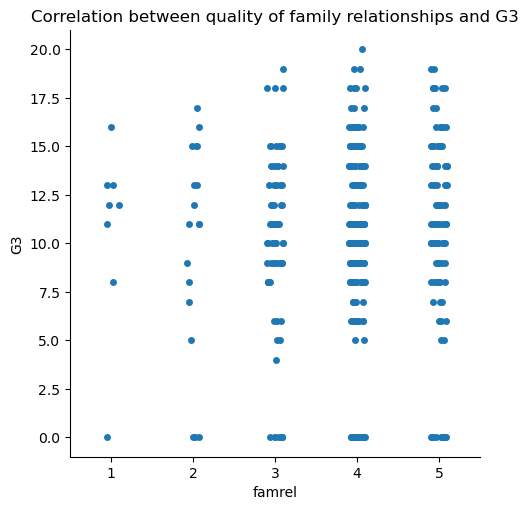

In [30]:
#plot the correlation between quality of family relationships and G3
sns.catplot(x='famrel', y='G3', data=df)
plt.title('Correlation between quality of family relationships and G3')
plt.show()


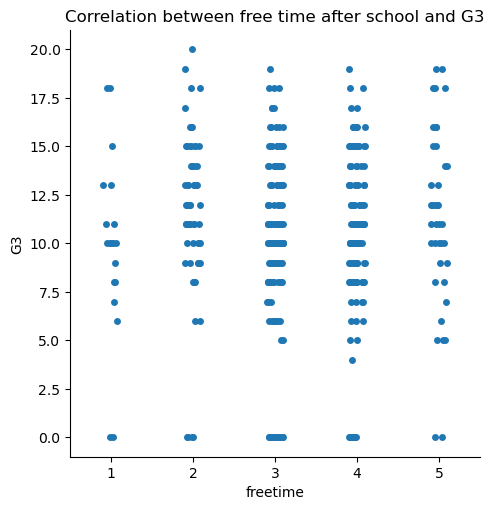

In [31]:
#plot the correlation between free time after school and G3
sns.catplot(x='freetime', y='G3', data=df)
plt.title('Correlation between free time after school and G3')
plt.show()


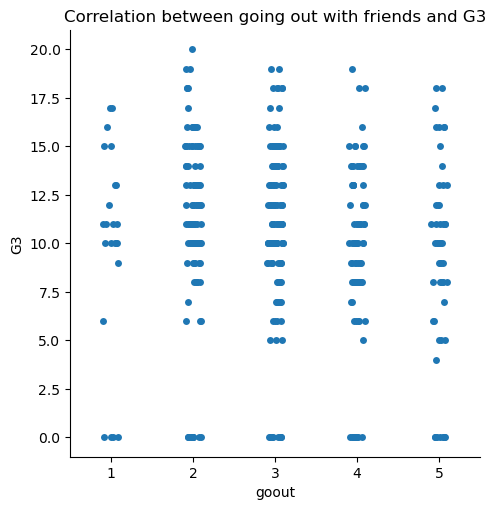

In [32]:
#plot the correlation between going out with friends and G3
sns.catplot(x='goout', y='G3', data=df)
plt.title('Correlation between going out with friends and G3')
plt.show()


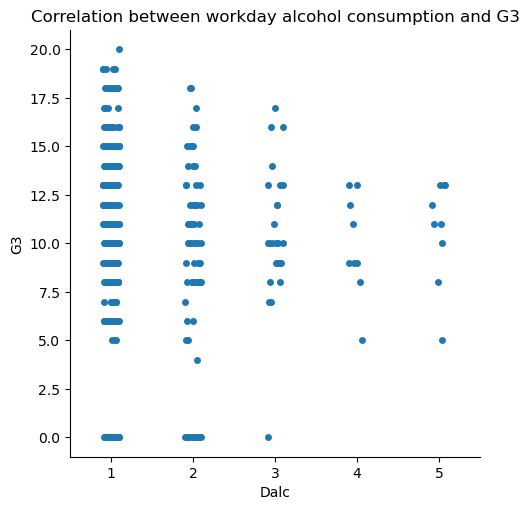

In [33]:
#plot the correlation between workday alcohol consumption and G3
sns.catplot(x='Dalc', y='G3', data=df)
plt.title('Correlation between workday alcohol consumption and G3')
plt.show()


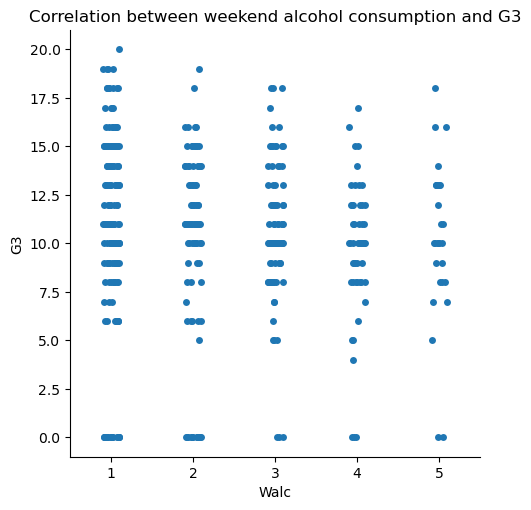

In [34]:
#plot the correlation between weekend alcohol consumption and G3
sns.catplot(x='Walc', y='G3', data=df)
plt.title('Correlation between weekend alcohol consumption and G3')
plt.show()


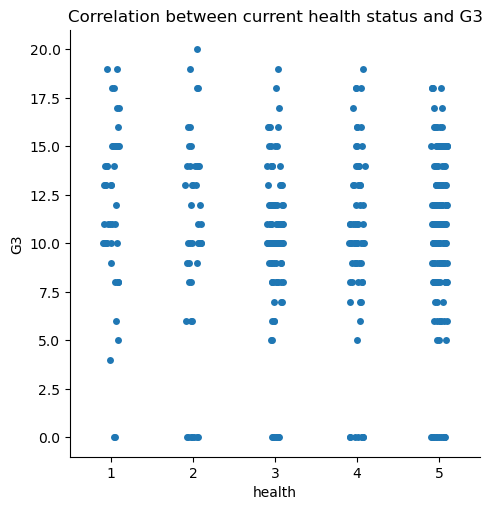

In [35]:
#plot the correlation between current health status and G3
sns.catplot(x='health', y='G3', data=df)
plt.title('Correlation between current health status and G3')
plt.show()


In [36]:
#group absences into 4 categories
df['absences'] = pd.cut(df['absences'], [-1, 0, 5, 10, 100], labels=['0', '1-5', '6-10', '10+'])
df['absences'].value_counts()



1-5     134
0       115
6-10     80
10+      66
Name: absences, dtype: int64

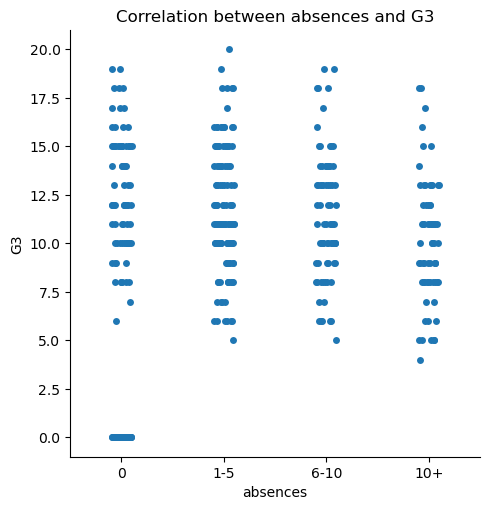

In [37]:
#plot the correlation between absences and G3
sns.catplot(x='absences', y='G3', data=df)
plt.title('Correlation between absences and G3')
plt.show()


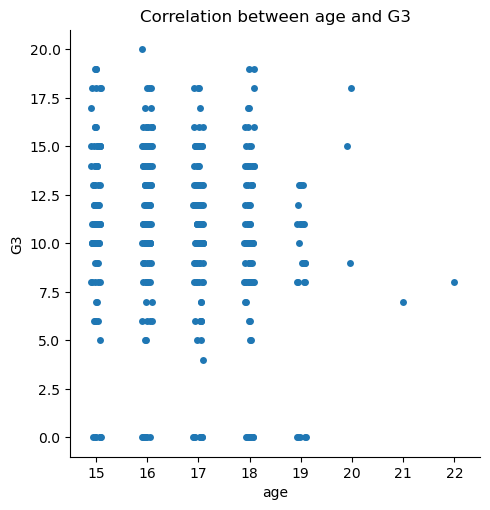

In [38]:
#plot the correlation between age and G3
sns.catplot(x='age', y='G3', data=df)
plt.title('Correlation between age and G3')
plt.show()


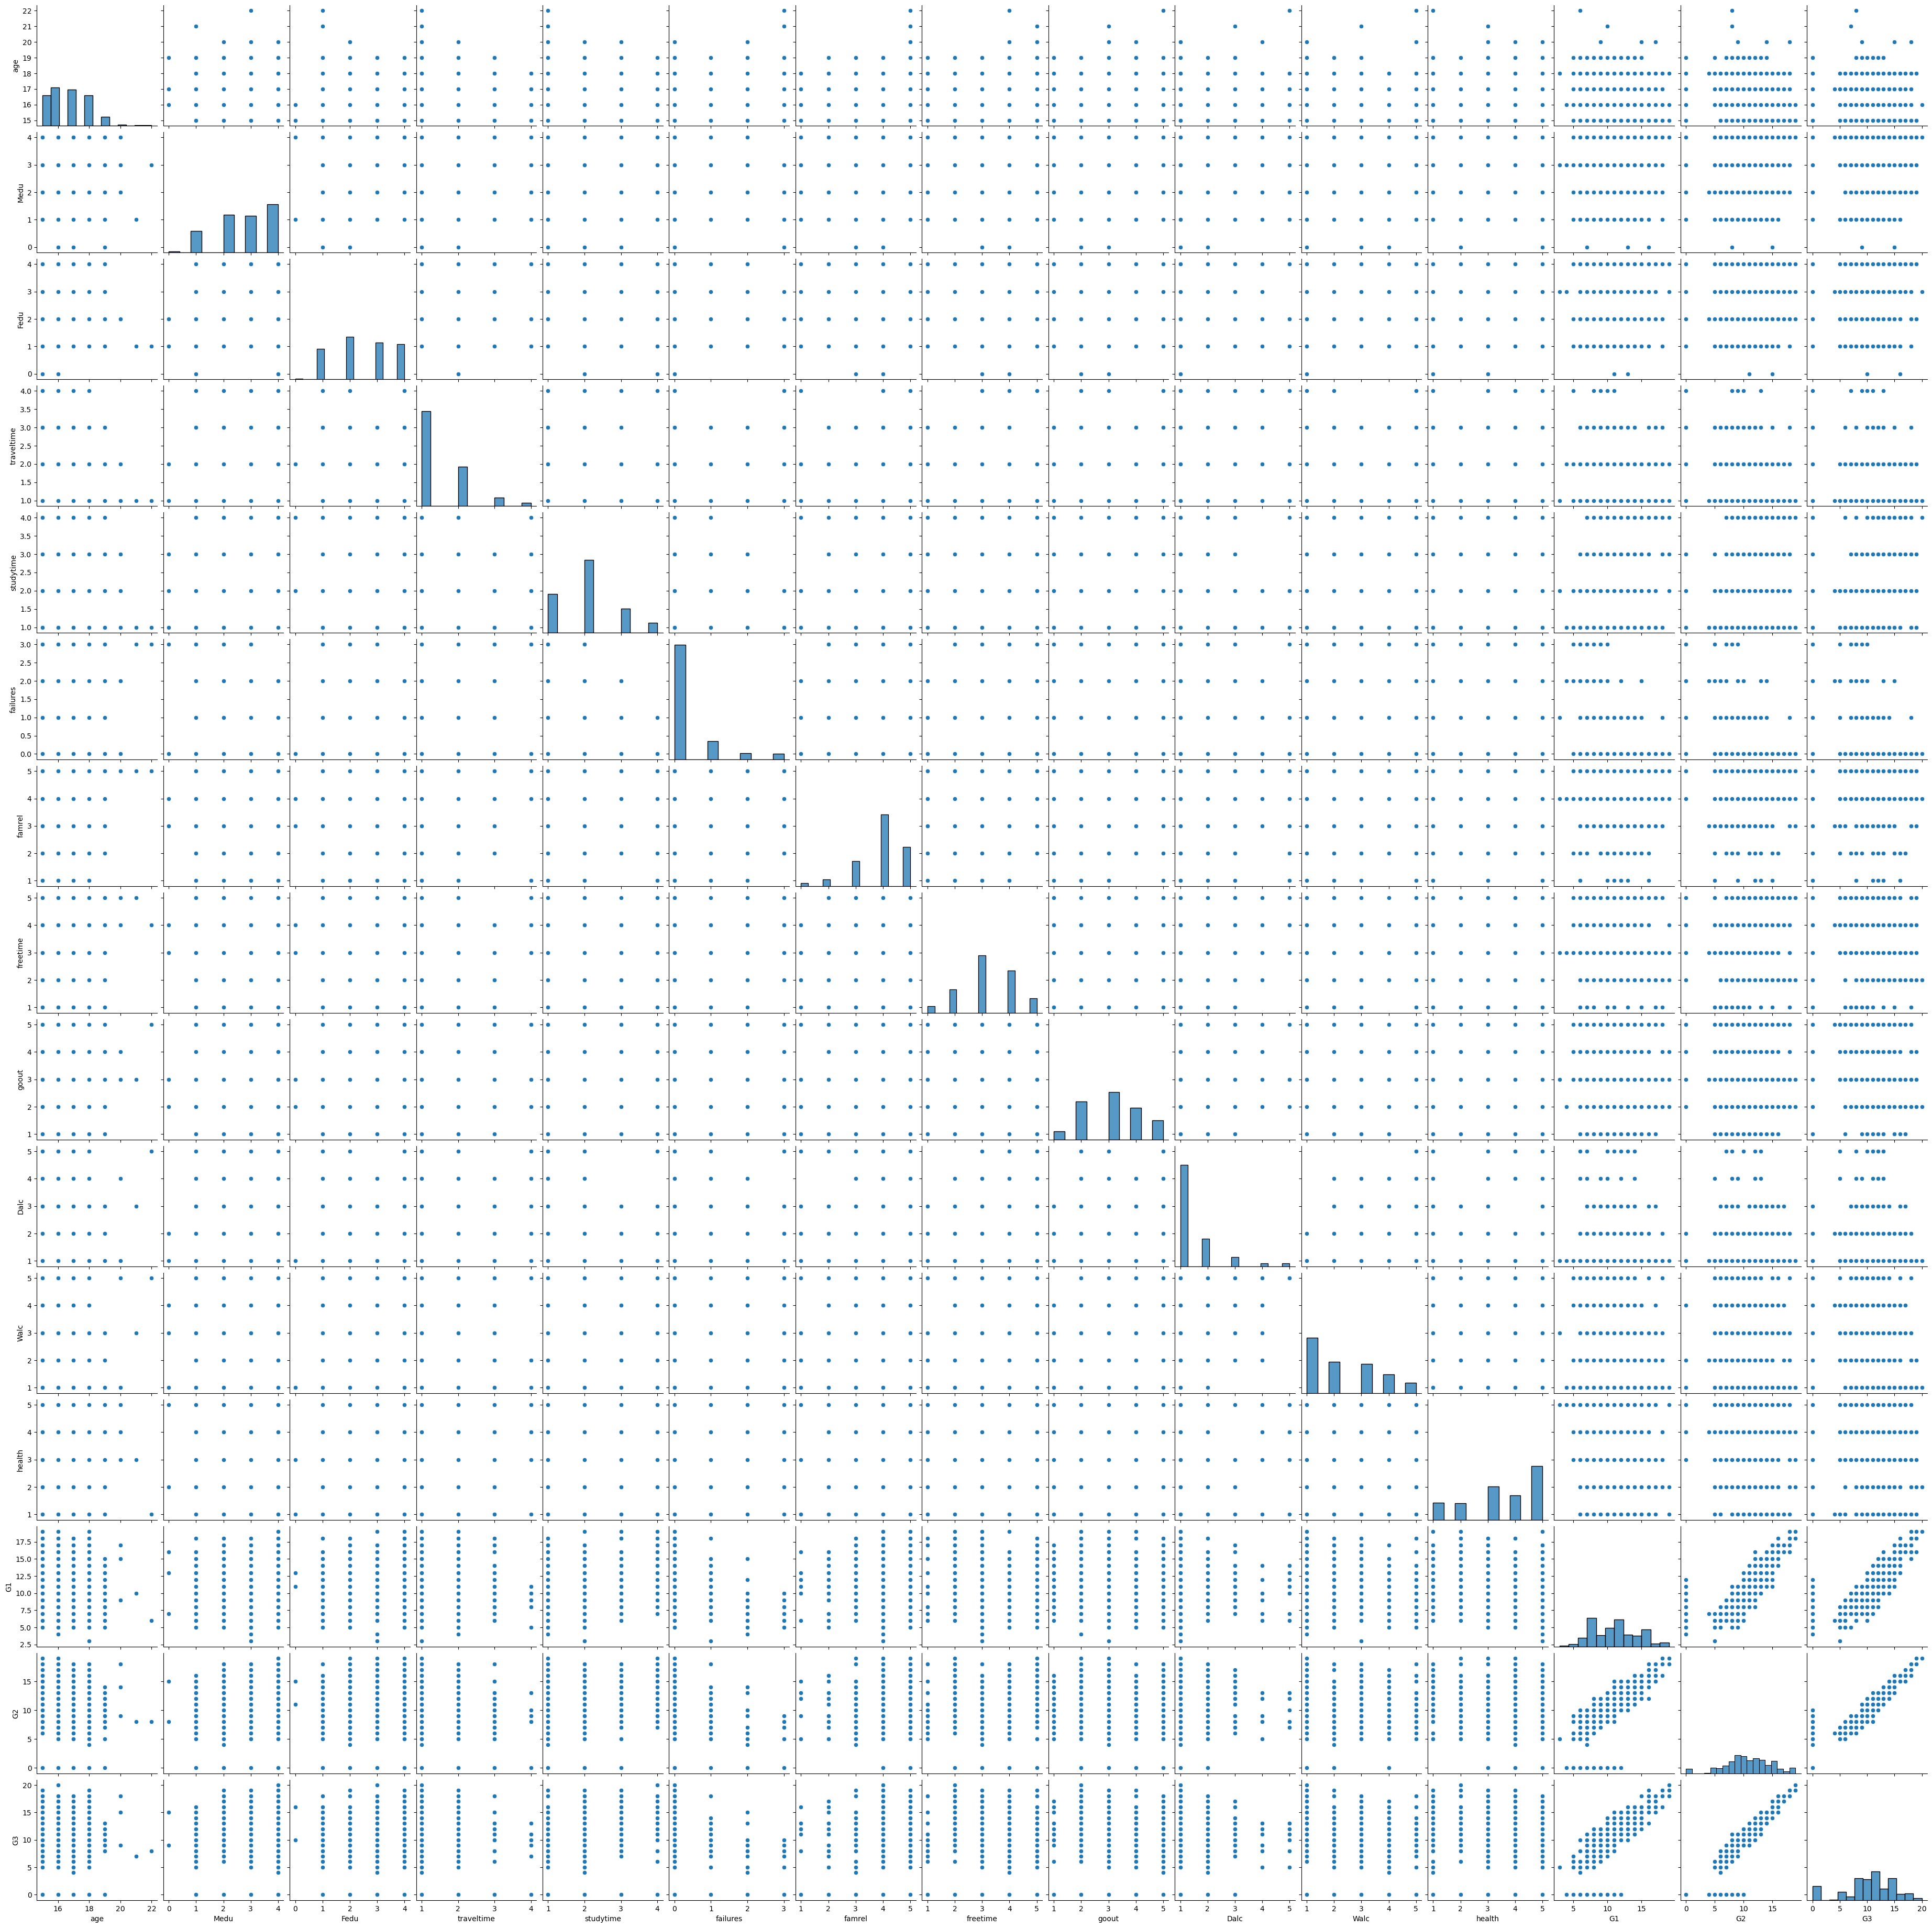

In [39]:
#pairplot of all numerical variables
sns.pairplot(df[numerical])
plt.show()


In [40]:
df_copy.columns


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    object  
 1   sex         395 non-null    object  
 2   age         395 non-null    int64   
 3   address     395 non-null    object  
 4   famsize     395 non-null    object  
 5   Pstatus     395 non-null    object  
 6   Medu        395 non-null    int64   
 7   Fedu        395 non-null    int64   
 8   Mjob        395 non-null    object  
 9   Fjob        395 non-null    object  
 10  reason      395 non-null    object  
 11  guardian    395 non-null    object  
 12  traveltime  395 non-null    int64   
 13  studytime   395 non-null    int64   
 14  failures    395 non-null    int64   
 15  schoolsup   395 non-null    object  
 16  famsup      395 non-null    object  
 17  paid        395 non-null    object  
 18  activities  395 non-null    object  
 19  nursery 

In [42]:
#one hot encode categorical variables of the copied dataframe
df_copy = pd.get_dummies(df_copy, columns = categorical, drop_first=True)
df_copy.head()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0


In [43]:
#show the data of the copied dataframe
df_copy.head()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0


In [44]:
#show abscences column of the copied dataframe
df_copy['absences'].head()


0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64

In [45]:
#show the data of the copied dataframe
df_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   Medu               395 non-null    int64
 2   Fedu               395 non-null    int64
 3   traveltime         395 non-null    int64
 4   studytime          395 non-null    int64
 5   failures           395 non-null    int64
 6   famrel             395 non-null    int64
 7   freetime           395 non-null    int64
 8   goout              395 non-null    int64
 9   Dalc               395 non-null    int64
 10  Walc               395 non-null    int64
 11  health             395 non-null    int64
 12  absences           395 non-null    int64
 13  G1                 395 non-null    int64
 14  G2                 395 non-null    int64
 15  G3                 395 non-null    int64
 16  school_MS          395 non-null    uint8
 17  sex_M           

In [46]:
#set the target variable
X = df_copy.drop('G3', axis=1)
y = df_copy['G3']

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Instantiate the linear regression model
lm = LinearRegression()

# Fit the model to the training data
lm.fit(X_train, y_train)

# Make predictions on the test data
predictions = lm.predict(X_test)

# Print the coefficients of the model
print("Coefficients: ", lm.coef_)

# Print the intercept of the model
print("Intercept: ", lm.intercept_)

# Print the predicted values
print("Predictions: ", predictions)

# Print the actual values
print("Actual values: ", y_test)

# Print the mean absolute error
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, predictions)
print("Mean Absolute Error: ", mae)

# Print the mean squared error
mse = metrics.mean_squared_error(y_test, predictions)
print("Mean Squared Error: ", mse)

# Print the root mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print("Root Mean Squared Error: ", rmse)

# Print the explained variance score
evs = metrics.explained_variance_score(y_test, predictions)
print("Explained Variance Score: ", evs)

# Print the R-squared score
r2 = metrics.r2_score(y_test, predictions)
print("R-squared Score: ", r2)

Coefficients:  [-0.23517401  0.14316701 -0.11210992 -0.00525209 -0.10915359 -0.14909147
  0.27002192  0.10523448  0.0433961  -0.1685578   0.15246858  0.11848511
  0.05061194  0.23934147  0.92521967  0.26844112  0.16081057  0.07058655
  0.16039315 -0.16654186 -0.70999682 -0.07306959 -0.02876485 -0.36987014
  0.69485681  0.13007829 -0.23517399 -0.01587748 -0.45484894  0.21639924
  0.06239464  0.15702498 -0.20630752  0.31658148  0.0520786   0.35395428
 -0.17835595 -0.20757655 -0.16605563 -0.07750874 -0.32664323]
Intercept:  -0.01739688990358701
Predictions:  [12.98791124 11.23300212 18.87178394 16.19728664  5.98287855  7.97767142
  9.71241767 12.93316805 13.46592147 15.08443015 19.0008285   7.57432976
 16.46106475 -0.32728976 11.76421156 12.11090573  9.52852125 18.51738
 12.81010332  9.33141749 13.88878232  2.37912624  3.75802269 18.25452815
  8.9156394  11.55620245  5.64141741 18.55004889 10.30865063 13.19975536
  9.39851517 13.3676359  13.97195939  4.6356844  19.00921198  7.46743178
  9

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19276\1753379731.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions), bins=50)


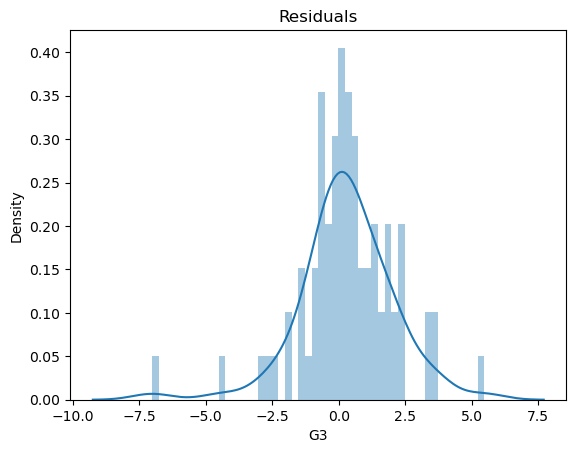

In [48]:
# Plot the residuals
sns.distplot((y_test - predictions), bins=50)
plt.title('Residuals')
plt.show()


In [49]:
#scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_copy.drop('G3', axis=1))
scaled_features = scaler.transform(df_copy.drop('G3', axis=1))
df_feat = pd.DataFrame(scaled_features, columns=df_copy.columns[:-1])
df_feat.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes
0,1.023046,1.143856,1.360371,0.792251,-0.042286,-0.449944,0.062194,-0.236010,0.801479,-0.540699,...,0.668496,-0.296908,2.597133,-1.257656,-0.919671,-1.017881,0.507899,0.23094,-2.232677,-0.708450
1,0.238380,-1.600009,-1.399970,-0.643249,-0.042286,-0.449944,1.178860,-0.236010,-0.097908,-0.540699,...,-1.495896,-0.296908,-0.385040,0.795130,-0.919671,-1.017881,-1.968894,0.23094,0.447893,-0.708450
2,-1.330954,-1.600009,-1.399970,-0.643249,-0.042286,3.589323,0.062194,-0.236010,-0.997295,0.583385,...,0.668496,-0.296908,2.597133,-1.257656,1.087346,-1.017881,0.507899,0.23094,0.447893,-0.708450
3,-1.330954,1.143856,-0.479857,-0.643249,1.150779,-0.449944,-1.054472,-1.238419,-0.997295,-0.540699,...,0.668496,-0.296908,-0.385040,0.795130,1.087346,0.982433,0.507899,0.23094,0.447893,1.411533
4,-0.546287,0.229234,0.440257,-0.643249,-0.042286,-0.449944,0.062194,-0.236010,-0.997295,-0.540699,...,-1.495896,-0.296908,-0.385040,0.795130,1.087346,-1.017881,0.507899,0.23094,-2.232677,-0.708450


In [50]:
#set the target variable
X1 = df_feat
y1 = df_copy['G3']


In [51]:
# Split the data into training and testing sets|
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=101)


In [52]:
# Instantiate the linear regression model
lm1 = LinearRegression()


In [53]:
# Fit the model to the training data
lm1.fit(X1_train, y1_train)

# Make predictions on the test data
predictions1 = lm1.predict(X1_test)

# Print the coefficients of the model
print("Coefficients: ", lm1.coef_)

# Print the intercept of the model
print("Intercept: ", lm1.intercept_)

# Print the predicted values
print("Predictions: ", predictions1)

# Print the actual values
print("Actual values: ", y1_test)

# Print the mean absolute error
mae1 = metrics.mean_absolute_error(y1_test, predictions1)
print("Mean Absolute Error: ", mae1)

# Print the mean squared error
mse1 = metrics.mean_squared_error(y1_test, predictions1)
print("Mean Squared Error: ", mse1)

# Print the root mean squared error
rmse1 = np.sqrt(metrics.mean_squared_error(y1_test, predictions1))
print("Root Mean Squared Error: ", rmse1)

# Print the explained variance score
evs1 = metrics.explained_variance_score(y1_test, predictions1)
print("Explained Variance Score: ", evs1)

# Print the R-squared score
r2_1 = metrics.r2_score(y1_test, predictions1)
print("R-squared Score: ", r2_1)

Coefficients:  [-0.29971198  0.15653144 -0.12184355 -0.00365872 -0.09149006 -0.11073158
  0.24181081  0.10498159  0.04825073 -0.14995124  0.19611504  0.1645216
  0.40453911  0.79341468  3.47580998  0.08610802  0.08029157  0.02937213
  0.07267655 -0.05079487 -0.19913719 -0.0350079  -0.01262918 -0.1309125
  0.14491227  0.06472135 -0.10570922 -0.00414118 -0.20331357  0.06228122
  0.0275641   0.07254924 -0.05629195  0.106158    0.02536971  0.17635844
 -0.08916397 -0.08380859 -0.03640719 -0.02891502 -0.15407827]
Intercept:  10.357909780672315
Predictions:  [12.98791124 11.23300212 18.87178394 16.19728664  5.98287855  7.97767142
  9.71241767 12.93316805 13.46592147 15.08443015 19.0008285   7.57432976
 16.46106475 -0.32728976 11.76421156 12.11090573  9.52852125 18.51738
 12.81010332  9.33141749 13.88878232  2.37912624  3.75802269 18.25452815
  8.9156394  11.55620245  5.64141741 18.55004889 10.30865063 13.19975536
  9.39851517 13.3676359  13.97195939  4.6356844  19.00921198  7.46743178
  9.239

In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.linear_model import LinearRegression

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'K Neighbors Regressor' : KNeighborsRegressor(),
    'Linear SVR' : LinearSVR(),
    'Cat Boost Regressor' : CatBoostRegressor(),
}

In [55]:
Name = ['Linear Regression','Decision Tree','Random Forest','SVR','XGBoost','LightGBM','Gradient Boosting Regressor' ,'ADA Boost' ,'K Neighbors Regressor','Linear SVR','Cat Boost Regressor']
accuracy = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Results for {name}:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared Score:", r2)
    accuracy.append(r2)
    print()

Results for Linear Regression:
Mean Squared Error (MSE): 3.219882071142879
Mean Absolute Error (MAE): 1.268515878338351
R-squared Score: 0.8299603654932923

Results for Decision Tree:
Mean Squared Error (MSE): 2.848101265822785
Mean Absolute Error (MAE): 1.0
R-squared Score: 0.8495938399052293

Results for Random Forest:
Mean Squared Error (MSE): 1.760306329113924
Mean Absolute Error (MAE): 0.910886075949367
R-squared Score: 0.9070395007615502

Results for SVR:
Mean Squared Error (MSE): 3.5201118179945197
Mean Absolute Error (MAE): 1.274255584789544
R-squared Score: 0.8141054505322067

Results for XGBoost:
Mean Squared Error (MSE): 1.8552115807566265
Mean Absolute Error (MAE): 0.9448685655488244
R-squared Score: 0.9020276233245718

Results for LightGBM:
Mean Squared Error (MSE): 2.23939131448134
Mean Absolute Error (MAE): 1.1125078942952245
R-squared Score: 0.8817393705053473

Results for Gradient Boosting Regressor:
Mean Squared Error (MSE): 2.170044200601788
Mean Absolute Error (MAE)

d:\python\odyn\anak2\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0:	learn: 4.5308475	total: 145ms	remaining: 2m 25s
1:	learn: 4.4471287	total: 147ms	remaining: 1m 13s
2:	learn: 4.3601657	total: 148ms	remaining: 49.2s
3:	learn: 4.2776175	total: 149ms	remaining: 37.2s
4:	learn: 4.1989173	total: 151ms	remaining: 30s
5:	learn: 4.1320754	total: 152ms	remaining: 25.2s
6:	learn: 4.0542439	total: 154ms	remaining: 21.8s
7:	learn: 3.9902671	total: 155ms	remaining: 19.2s
8:	learn: 3.9132155	total: 157ms	remaining: 17.2s
9:	learn: 3.8399491	total: 158ms	remaining: 15.6s
10:	learn: 3.7624740	total: 159ms	remaining: 14.3s
11:	learn: 3.6985669	total: 161ms	remaining: 13.2s
12:	learn: 3.6403679	total: 162ms	remaining: 12.3s
13:	learn: 3.5857155	total: 163ms	remaining: 11.5s
14:	learn: 3.5276373	total: 165ms	remaining: 10.8s
15:	learn: 3.4732302	total: 166ms	remaining: 10.2s
16:	learn: 3.4108054	total: 167ms	remaining: 9.68s
17:	learn: 3.3569982	total: 169ms	remaining: 9.22s
18:	learn: 3.3015176	total: 170ms	remaining: 8.79s
19:	learn: 3.2389002	total: 172ms	remaini

In [56]:
accuracy

[0.8299603654932923,
 0.8495938399052293,
 0.9070395007615502,
 0.8141054505322067,
 0.9020276233245718,
 0.8817393705053473,
 0.8854015412425473,
 0.8540391875734225,
 0.8540057539346759,
 0.8567149589572816,
 0.8901015940116574]

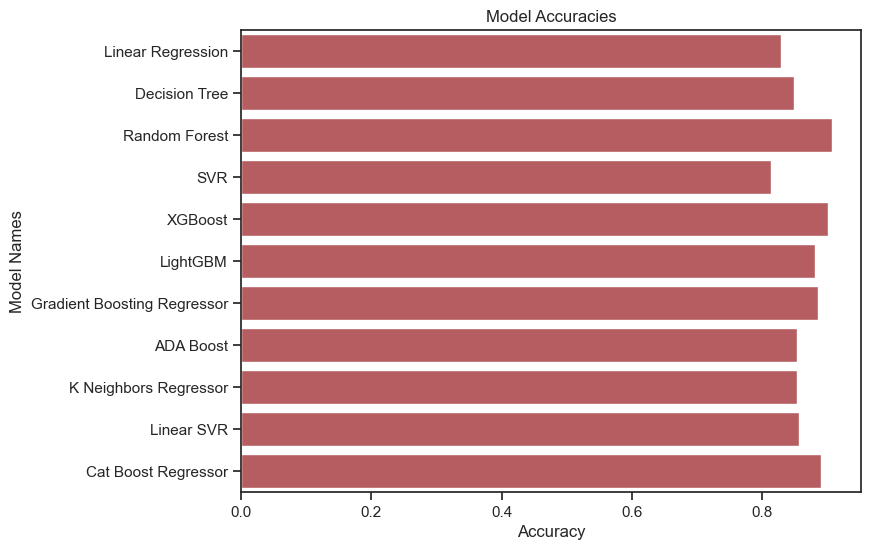

In [57]:
data = pd.DataFrame({"Names": Name, "Accuracies": accuracy})

sns.set(style="ticks")
plt.figure(figsize=(8, 6))

sns.barplot(x="Accuracies", y="Names", data=data, color="r")

plt.xlabel("Accuracy")
plt.ylabel("Model Names")
plt.title("Model Accuracies")

plt.show()

The best value for k neighbors in classification is: 20 with an accuracy of 0.4177


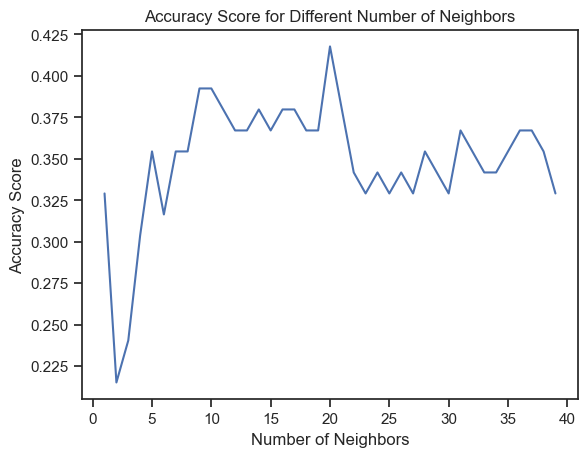

In [60]:
#create a function that checks for the best amount of neighbors
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def check_neighbors(X_train, y_train, X_test, y_test, k):
    best_score = 0
    best_k = 0
    scores = []
    neighbors = []
    
    for i in range(1, k):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        
        scores.append(score)
        neighbors.append(i)
        
        if score > best_score:
            best_score = score
            best_k = i
            
    return best_k, best_score, neighbors, scores

best_k, best_score, neighbors, scores = check_neighbors(X_train, y_train, X_test, y_test, 100)
print(f"The best value for k neighbors in classification is: {best_k} with an accuracy of {best_score:.4f}")

plt.plot(neighbors, scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for Different Number of Neighbors')
plt.show()

The best value for k neighbors in regression is: 4 with an R-squared score of 0.8764


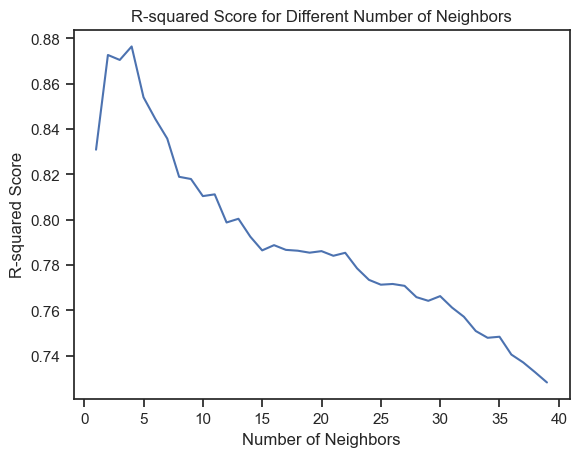

In [61]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

def check_neighbors(X_train, y_train, X_test, y_test, k):
    best_score = 0
    best_k = 0
    scores = []
    neighbors = []
    
    for i in range(1, k):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        
        scores.append(score)
        neighbors.append(i)
        
        if score > best_score:
            best_score = score
            best_k = i
            
    return best_k, best_score, neighbors, scores

best_k, best_score, neighbors, scores = check_neighbors(X_train, y_train, X_test, y_test, 100)
print(f"The best value for k neighbors in regression is: {best_k} with an R-squared score of {best_score:.4f}")

plt.plot(neighbors, scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('R-squared Score')
plt.title('R-squared Score for Different Number of Neighbors')
plt.show()